In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tennessee = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Tennesse.csv")
georgia = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Georgia.csv")
ohio = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Ohio.csv")
california = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\California.csv")
florida = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Florida.csv")
washington = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Washington.csv")
colorado = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Colorado.csv")
massachusetts = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Massachusetts.csv")
kansas = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Kansas.csv")
north_carolina = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\North_Carolina.csv")
missouri = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Missouri.csv")
minnesota = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Minnesota.csv")
pennsylvania = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Pennsylvania.csv")
utah = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Utah.csv")
illinois = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Illinois.csv")
texas = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Texas.csv")
oregon = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Oregon.csv")
new_york = pd.read_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\New_York.csv")

dataframes = [tennessee, georgia, ohio, california, florida, washington, colorado, massachusetts, kansas, north_carolina, missouri, minnesota, pennsylvania, utah, illinois, texas, oregon, new_york]

estados = pd.concat(dataframes, ignore_index=True)

### Análisis general del EDA de cada estado

De los datasets analizados de cada estado podemos concluir que los locales que tenían más reseñas también eran los locales que mejores puntuaciones tenían. Esto podría deberse a que estos suelen ofrecer un servicio consistente y de alta calidad, lo que incentiva a los clientes a dejar comentarios positivos. Además, la popularidad de estos locales lleva a un mayor tráfico de clientes, incrementando la cantidad de reseñas.

### Información general del dataframe

In [4]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457983 entries, 0 to 457982
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   457983 non-null  float64
 1   name                      457977 non-null  object 
 2   rating                    457983 non-null  int64  
 3   text                      272342 non-null  object 
 4   resp                      41141 non-null   object 
 5   gmap_id                   457983 non-null  object 
 6   review_sentiment          457983 non-null  float64
 7   nombre_local              457983 non-null  object 
 8   direccion                 457983 non-null  object 
 9   ciudad                    457983 non-null  object 
 10  codigo_postal_cod_ciudad  457983 non-null  object 
 11  codigo_ciudad             457983 non-null  object 
 12  codigo_postal             457983 non-null  object 
 13  latitude                  457983 non-null  f

### Descripción de columnas relevantes

In [5]:
estados["rating"].describe()

count    457983.000000
mean          4.212193
std           1.148821
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [6]:
estados["avg_rating"].describe()

count    457983.000000
mean          4.165940
std           0.425113
min           1.400000
25%           4.000000
50%           4.200000
75%           4.500000
max           5.000000
Name: avg_rating, dtype: float64

In [7]:
estados["num_of_reviews"].describe()

count    457983.000000
mean        478.364824
std         836.394058
min           6.000000
25%          68.000000
50%         138.000000
75%         385.000000
max        5321.000000
Name: num_of_reviews, dtype: float64

### Análisis de valores nulos

In [8]:
print(estados.isnull().sum())


user_id                          0
name                             6
rating                           0
text                        185641
resp                        416842
gmap_id                          0
review_sentiment                 0
nombre_local                     0
direccion                        0
ciudad                           0
codigo_postal_cod_ciudad         0
codigo_ciudad                    0
codigo_postal                    0
latitude                         0
longitude                        0
category                         0
avg_rating                       0
num_of_reviews                   0
price                       123474
MISC                          3864
dtype: int64


### Outliers

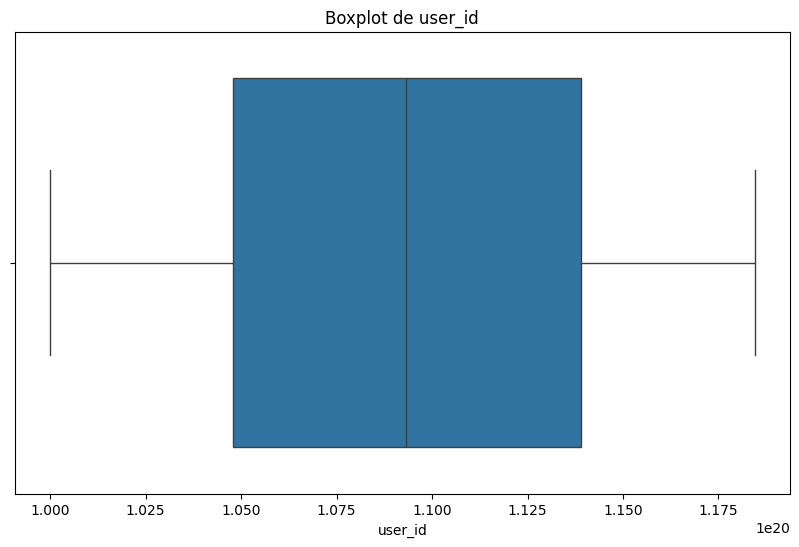

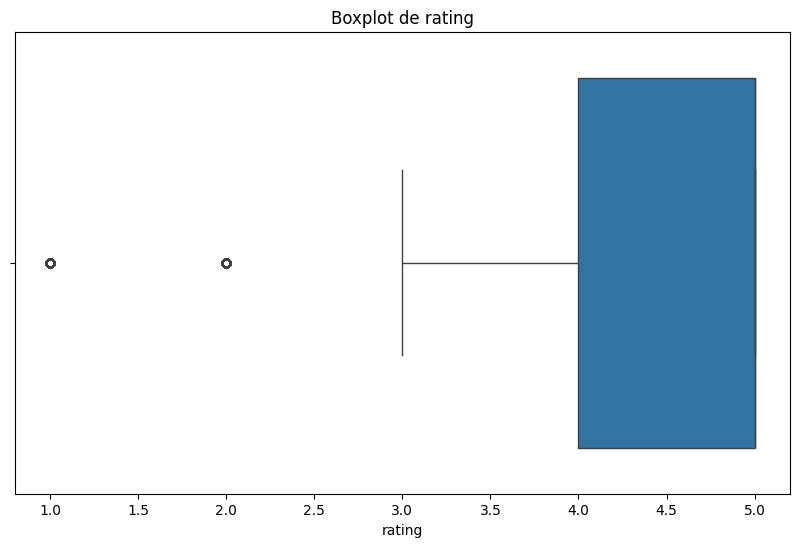

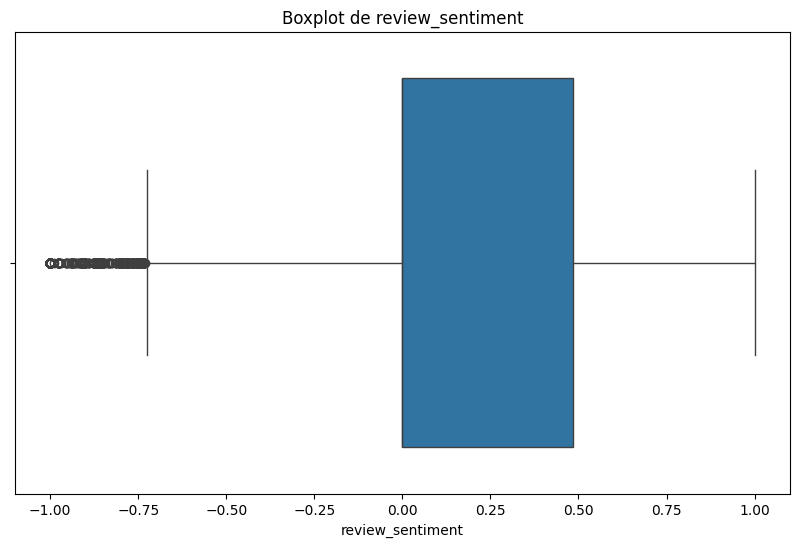

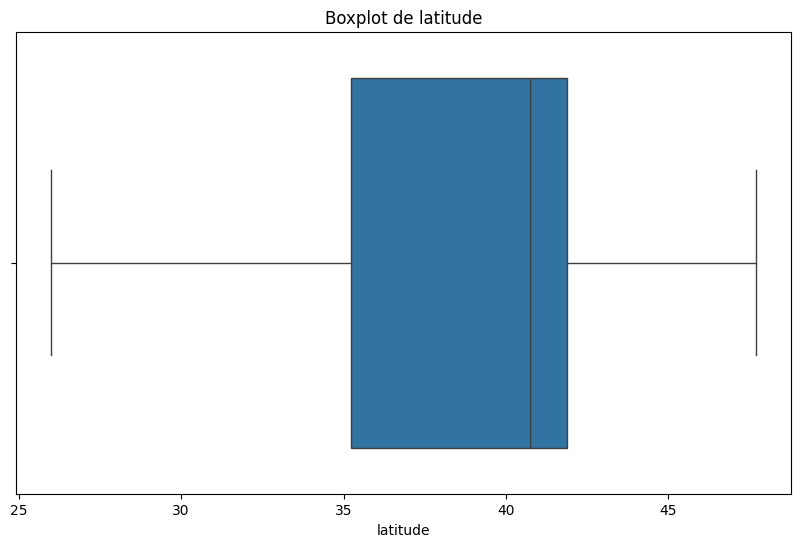

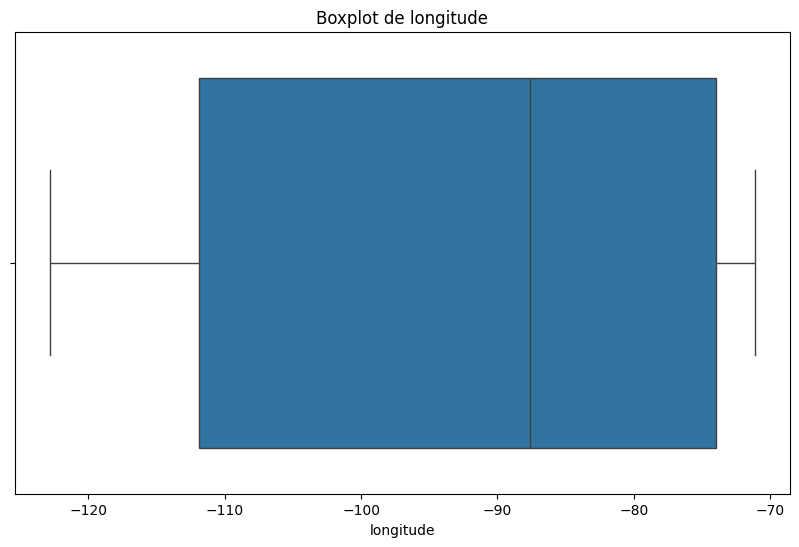

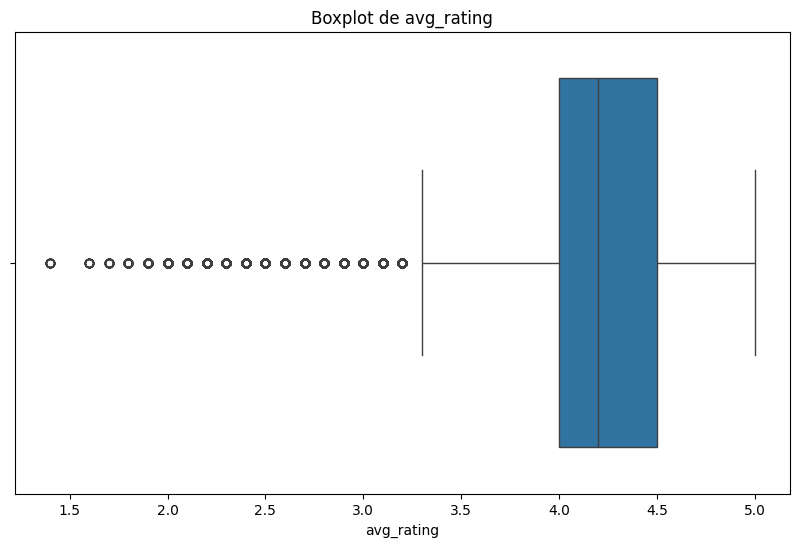

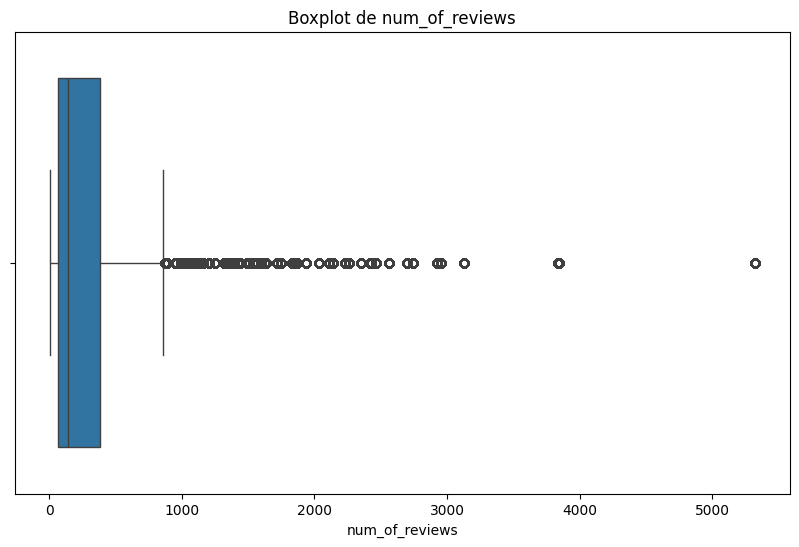

In [9]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers = detect_outliers_iqr(estados)



for column in estados.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=estados[column])
    plt.title(f"Boxplot de {column}")
    plt.show()

### Distribución de Número de Reseñas

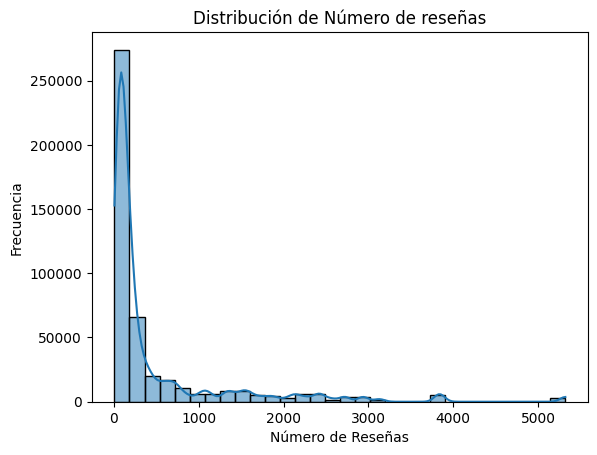

In [10]:
sns.histplot(estados["num_of_reviews"], bins=30, kde=True)
    
    # Agregar títulos y etiquetas
plt.title("Distribución de Número de reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Frecuencia")
    
    # Mostrar la gráfica
plt.show()

En este gráfico podemos ver que hay muchos locales que aún no han tenido reseñas

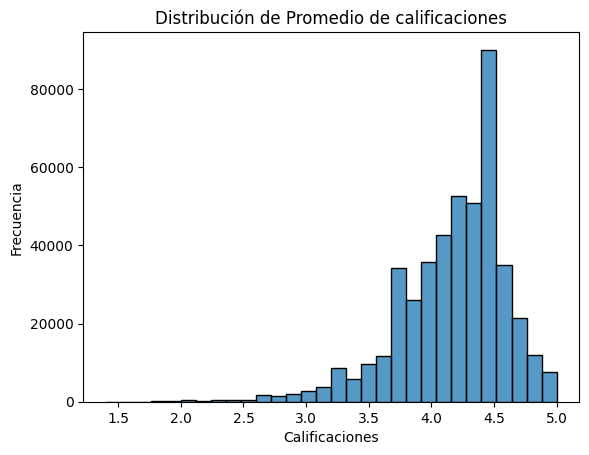

In [11]:
sns.histplot(estados["avg_rating"], bins=30)
    
    # Agregar títulos y etiquetas
plt.title("Distribución de Promedio de calificaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
    
    # Mostrar la gráfica
plt.show()

La mayoría de las calificaciones se orientan a ser positivas. Los clientes dejarían mayormente reseñas en promedio positivas más que negativas en esta plataforma.

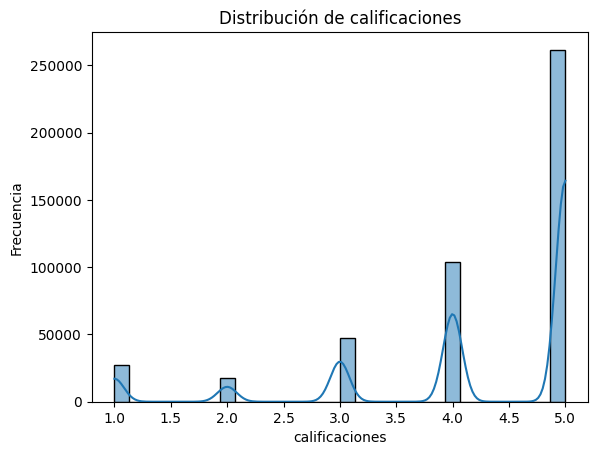

In [12]:
sns.histplot(estados["rating"], bins=30, kde=True)
    
plt.title("Distribución de calificaciones")
plt.xlabel("calificaciones")
plt.ylabel("Frecuencia")
    
plt.show()

Nuevamente vemos en este gráfico que los clientes dejan mayormente reseñas de 4 o 5 (siendo el puntaje de 1 a 5)

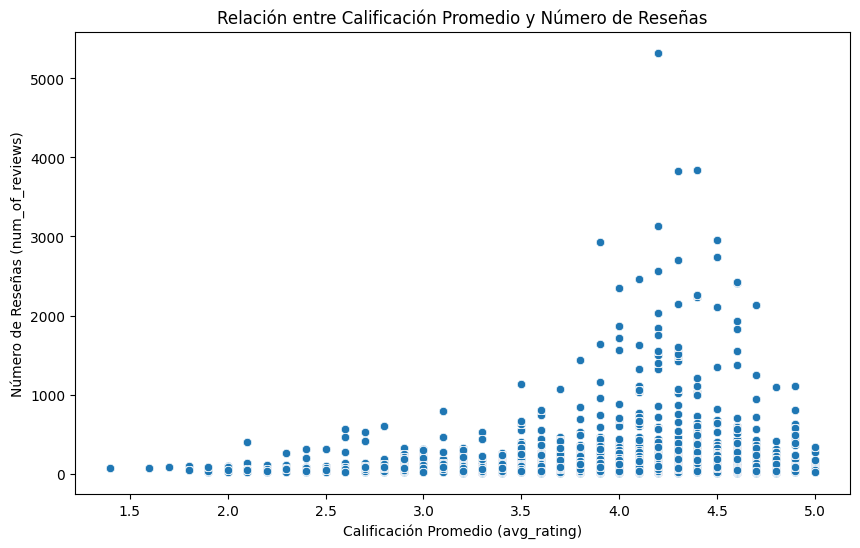

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="avg_rating", y="num_of_reviews", data=estados)
plt.title("Relación entre Calificación Promedio y Número de Reseñas")
plt.xlabel("Calificación Promedio (avg_rating)")
plt.ylabel("Número de Reseñas (num_of_reviews)")
plt.show()


El gráfico de dispersión entre avg_rating y num_of_reviews nos permite observar visualmente si existe alguna tendencia o patrón entre estas dos variables.
Hay una gran variabilidad en el número de reseñas por categoría. Algunos puntos tienen muy pocas reseñas (cerca de 0), mientras que otros tienen muchas (hasta más de 5000).
Hay varios puntos que se destacan como outliers, con un número de reseñas mucho mayor al promedio (outliers).
Algunos estados tienen negocios o entidades que reciben muchas más reseñas que otros.Los estados con más reseñas podrían indicar una mayor interacción o compromiso de los clientes en esas áreas.



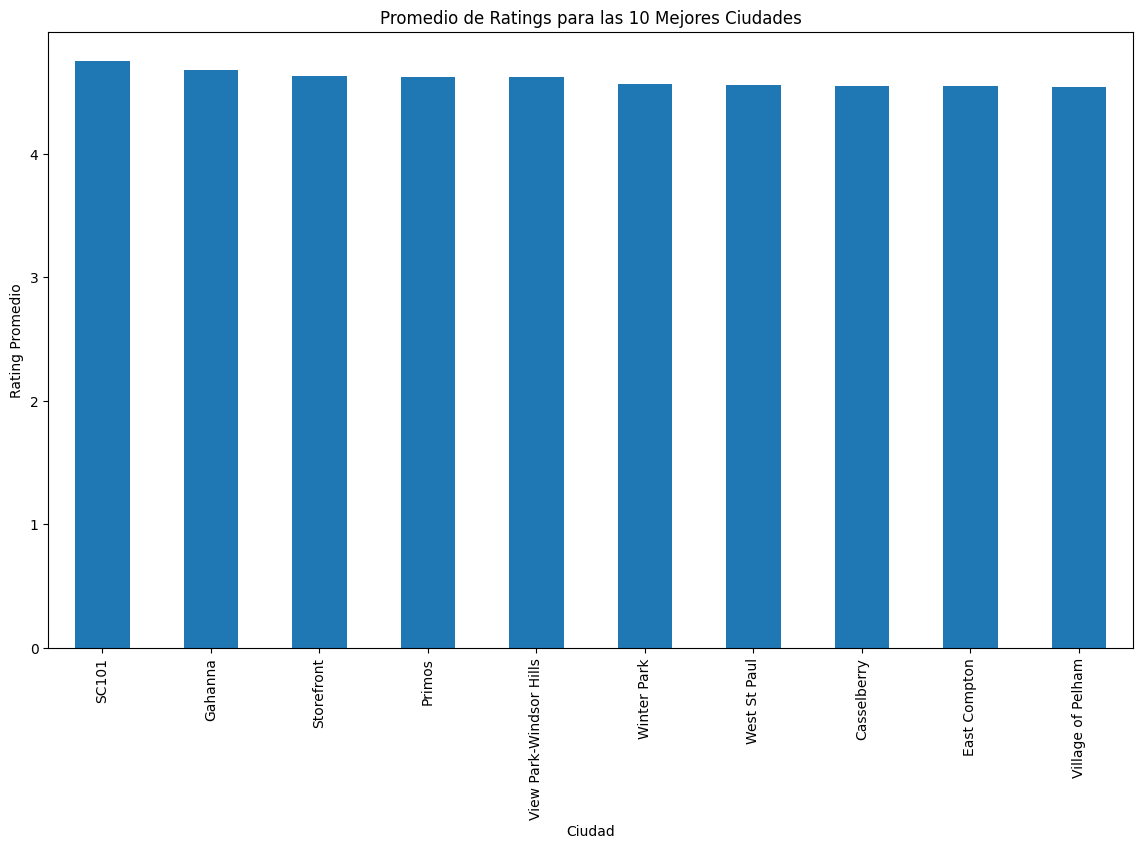

In [14]:
avg_ratings_by_city = estados.groupby("ciudad")["rating"].mean().sort_values(ascending=False)

top_10_cities = avg_ratings_by_city.head(10).index

top_10_df = estados[estados["ciudad"].isin(top_10_cities)]

plt.figure(figsize=(14, 8))
top_5_avg_ratings = avg_ratings_by_city.head(10)
top_5_avg_ratings.plot(kind='bar')
plt.title("Promedio de Ratings para las 10 Mejores Ciudades")
plt.xlabel("Ciudad")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=90)
plt.show()


Las ciudades con mejores ratings son ideales para recibir inversiones adicionales, lo que permitirá mantener su nivel de servicio o expandir sus operaciones. Además, estas ciudades pueden ser destacadas en campañas de marketing como ejemplos de éxito, atrayendo más clientes y mejorando la reputación general. Identificar patrones comunes en estas ciudades puede ayudar a desarrollar estrategias a largo plazo para mejorar los servicios en otras áreas.

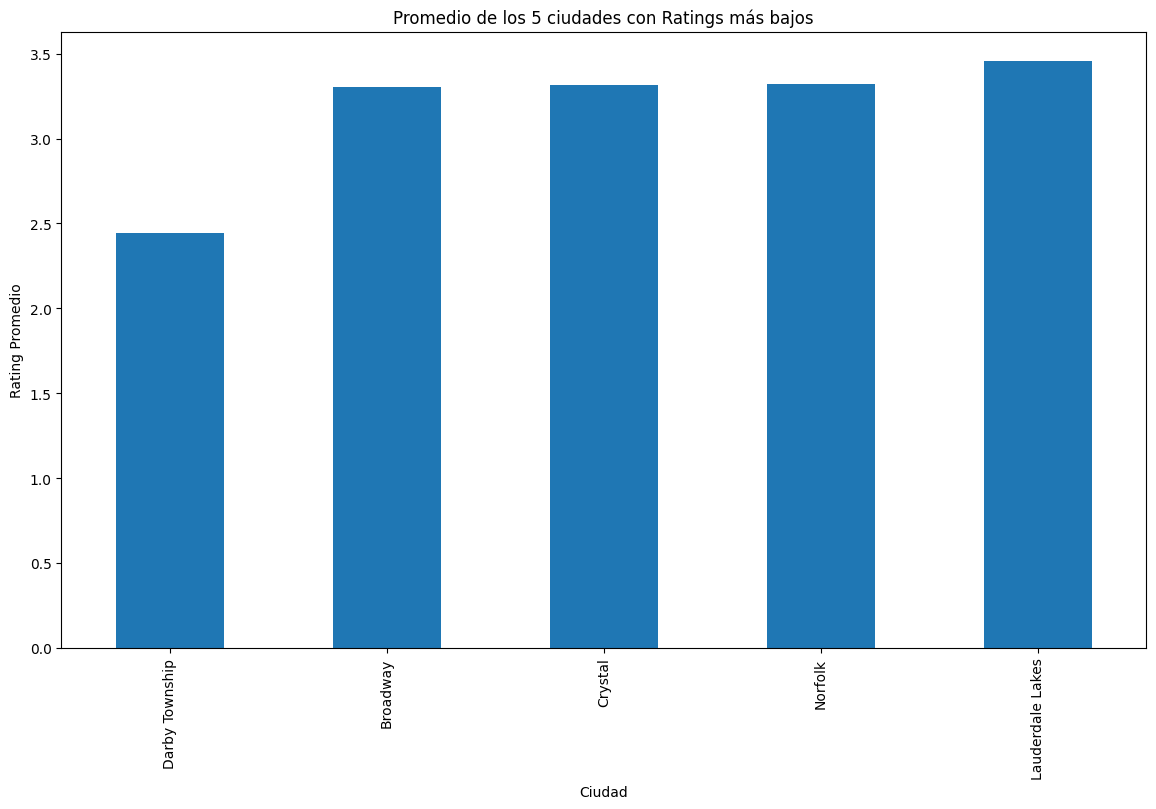

In [15]:
avg_ratings_by_state = estados.groupby("ciudad")["rating"].mean().sort_values()

bottom_5_states = avg_ratings_by_state.head(5).index

bottom_5_df = estados[estados["ciudad"].isin(bottom_5_states)]

plt.figure(figsize=(14, 8))
bottom_5_avg_ratings = avg_ratings_by_state.head(5)
bottom_5_avg_ratings.plot(kind='bar')
plt.title("Promedio de los 5 ciudades con Ratings más bajos")
plt.xlabel("Ciudad")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=90)
plt.show()



Las ciudades con ratings más bajos pueden requerir atención inmediata y recursos para mejorar sus servicios.Con esta información, puedes priorizar la asignación de recursos (financieros, humanos, tecnológicos) para mejorar los ratings en estas ciudades.Se puede utilizar el feedback negativo de estas ciudades para hacer cambios y mejoras en los servicios. Conocer cuáles son las ciudades con locales con menos puntajes también puede ayudar a tomar desiciones respecto a inversiones. 


Y el dataset final se pasa a los Data Engeneer para que puedan seguir siendo procesados